In [1]:
import pandas as pd
from functools import reduce 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [2]:
ipc =pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")

In [3]:
ipc.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [4]:
ipc_crimes=['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES']

In [5]:
ipc_dis = ipc.groupby("DISTRICT",as_index=False)['TOTAL IPC CRIMES'].sum()

In [6]:
ipc_dis.columns = ipc_dis.columns.str.strip().str.upper()

In [7]:
ipc_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DISTRICT          808 non-null    object
 1   TOTAL IPC CRIMES  808 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.8+ KB


In [8]:
sc = pd.read_csv("02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")

In [9]:
sc.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'],
      dtype='object')

In [10]:
sc_crimes=['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']

In [11]:
sc["SC TOTAL CRIMES"] = sc[sc_crimes].sum(axis=1)

In [12]:
sc_dis = sc.groupby("DISTRICT",as_index=False)["SC TOTAL CRIMES"].sum()

In [13]:
sc_dis.columns = sc_dis.columns.str.strip().str.upper()

In [14]:
sc_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DISTRICT         813 non-null    object
 1   SC TOTAL CRIMES  813 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.8+ KB


In [15]:
st =pd.read_csv("02_District_wise_crimes_committed_against_ST_2001_2012.csv")

In [16]:
st.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Protection of Civil Rights (PCR) Act',
       'Prevention of atrocities (POA) Act', 'Other Crimes Against STs'],
      dtype='object')

In [17]:
st_crimes=['Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Protection of Civil Rights (PCR) Act',
       'Prevention of atrocities (POA) Act', 'Other Crimes Against STs']

In [18]:
st["TOTAL ST CRIMES"] = st[st_crimes].sum(axis=1)

In [19]:
st_dis=st.groupby("DISTRICT",as_index=False)["TOTAL ST CRIMES"].sum()

In [20]:
st_dis.columns = st_dis.columns.str.strip().str.upper()

In [21]:
st_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DISTRICT         813 non-null    object
 1   TOTAL ST CRIMES  813 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.8+ KB


In [22]:
child = pd.read_csv("03_District_wise_crimes_committed_against_children_2001_2012.csv")

In [23]:
child.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes', 'Total'],
      dtype='object')

In [24]:
child_crimes=['Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes']

In [25]:
child["TOTAL CHILD CRIMES"] = child[child_crimes].sum(axis=1)

In [26]:
child_dis = child.groupby("DISTRICT",as_index=False)["TOTAL CHILD CRIMES"].sum()

In [27]:
child_dis.columns = child_dis.columns.str.strip().str.upper()

In [28]:
child_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DISTRICT            821 non-null    object 
 1   TOTAL CHILD CRIMES  821 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.0+ KB


In [29]:
women = pd.read_csv("42_District_wise_crimes_committed_against_women_2001_2012.csv")

In [30]:
women.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [31]:
women_crimes=['Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls']

In [32]:
women["TOTAL WOMEN CRIMES"] =women[women_crimes].sum(axis=1)

In [33]:
women_dis = women.groupby("DISTRICT",as_index=False)["TOTAL WOMEN CRIMES"].sum()

In [34]:
women_dis.columns=women_dis.columns.str.strip().str.upper()

In [35]:
women_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DISTRICT            808 non-null    object
 1   TOTAL WOMEN CRIMES  808 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.8+ KB


In [36]:
def prefix_columns(df, prefix):
    df=df.copy()
    df.columns=["DISTRICT"]+[f"{prefix}_{col}" for col in df.columns if col!="DISTRICT"]
    return df
ipc_dis =prefix_columns(ipc_dis,"IPC")
sc_dis = prefix_columns(sc_dis,"SC")
st_dis = prefix_columns(st_dis,"ST")
child_dis =prefix_columns(child_dis,"CHILD")
women_dis =prefix_columns(women_dis,"WOMEN")

In [37]:
dfs =[ipc_dis,sc_dis,st_dis,child_dis,women_dis]
merge_data =reduce(lambda left,right:pd.merge(left,right, on="DISTRICT",how ="outer"),dfs)

In [38]:
merge_data.fillna(0,inplace=True)

In [39]:
ss = StandardScaler()

In [40]:
df_cluster =merge_data.copy()

In [41]:
district = df_cluster["DISTRICT"]

In [42]:
df_cluster = df_cluster.drop(columns=["DISTRICT"])

In [43]:
scaled_merge = ss.fit_transform(df_cluster)

In [44]:
kmeans =KMeans(n_clusters = 3,random_state = 42)

In [45]:
clusters = kmeans.fit_predict(scaled_merge)

In [46]:
clusters

array([2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

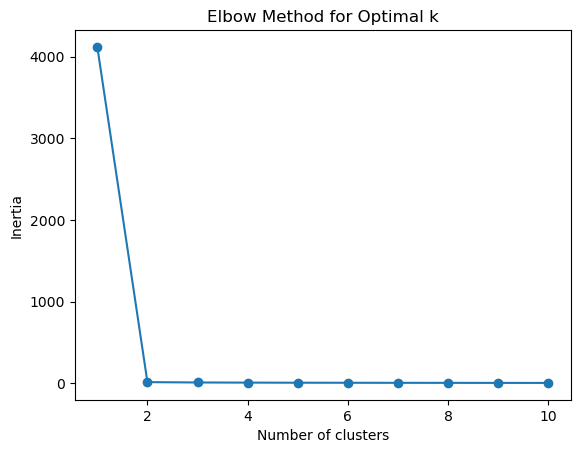

In [47]:
import matplotlib.pyplot as plt
inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_merge)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
# as our elbow method is showing 2 as an optimal number of clusters but we want three clusters so we have to go with 3 clusters 

In [48]:
unique, counts = np.unique(clusters, return_counts=True)
dict(zip(unique, counts))
# this shows a very big cluster 0 and cluster 1 has only one value point while cluster 2 has 150 value points that means we have to handle the skewness in the dataset

{0: 673, 1: 1, 2: 150}

In [50]:
pca =PCA(n_components =2)
pca_ = pca.fit_transform(scaled_merge)

In [51]:
pca_.shape

(824, 2)

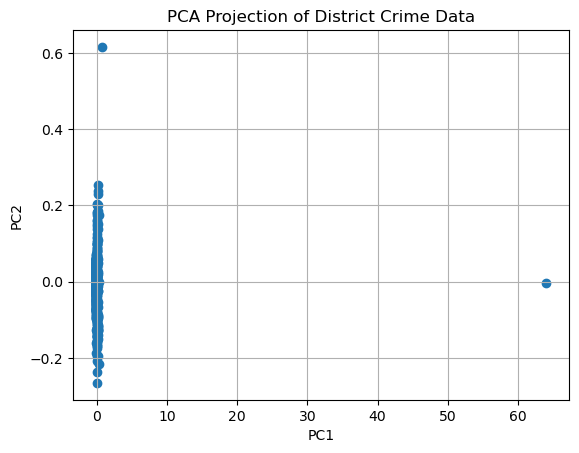

In [52]:
plt.scatter(pca_[:, 0], pca_[:, 1])
plt.title("PCA Projection of District Crime Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

In [53]:
merge_data["CLUSTERS"]=clusters

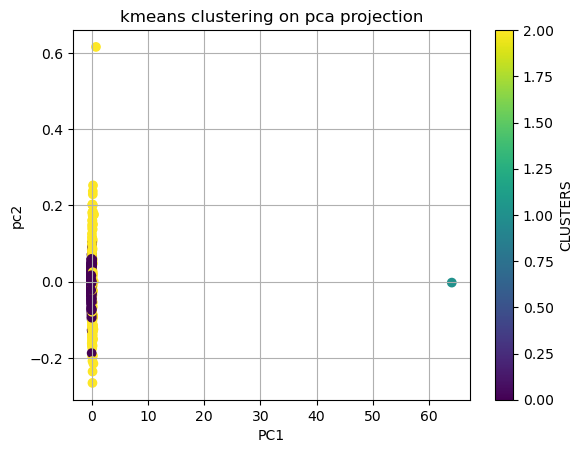

In [55]:
plt.scatter(pca_[:,0],pca_[:,1],c =clusters,cmap="viridis")
plt.title("kmeans clustering on pca projection")
plt.xlabel("PC1")
plt.ylabel("pc2")
plt.colorbar(label="CLUSTERS")
plt.grid()
plt.show()

Removed 26 outliers.


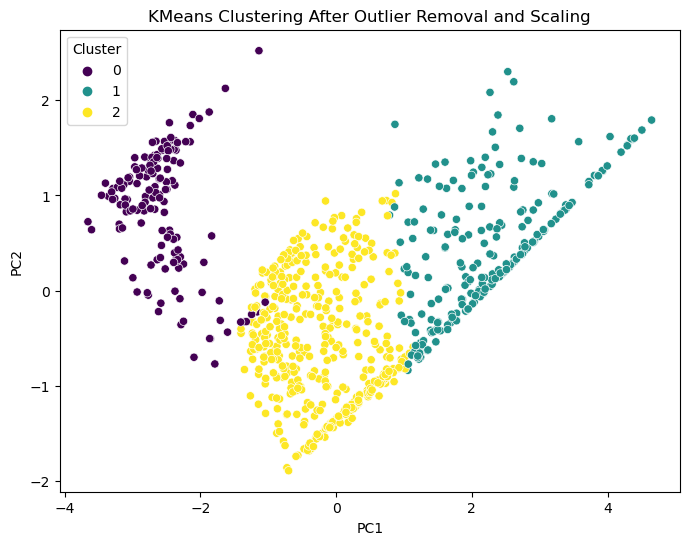

In [56]:
# as we can see here we have one big cluster for 0 so we have to change our approach and preprocess our data here we have improved our output pretty well 


# Step 1: Drop non-numeric and extract features
features = merge_data.drop(columns=['DISTRICT'])

#Log transform to handle skewness
features_log = np.log1p(features)

# Step 2: Scale the data
scaler = RobustScaler()
X_scaled = scaler.fit_transform(features_log)
X_df = pd.DataFrame(X_scaled, columns=features.columns)

# Step 3: Remove outliers beyond 3 standard deviations
z_scores = np.abs(X_df)
outliers = (z_scores > 3).any(axis=1)
X_clean = X_df[~outliers]

print(f"Removed {outliers.sum()} outliers.")

# Step 4: PCA for 2D projection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clean)

# Step 5: KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_clean)

# Step 6: Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title("KMeans Clustering After Outlier Removal and Scaling")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.show()


In [57]:
# Get the indices of the data that remained after removing outliers
clean_indices = X_df[~outliers].index

# Get corresponding districts from the original data
districts_clean = merge_data.loc[clean_indices, 'DISTRICT']

# Combine into a DataFrame
clustered_districts = pd.DataFrame({
    'DISTRICT': districts_clean.values,
    'CLUSTER': clusters
})

# Show the result
print(clustered_districts.head())


            DISTRICT  CLUSTER
0  24 PARGANAS NORTH        0
1  24 PARGANAS SOUTH        0
2    A and N ISLANDS        1
3           ADILABAD        0
4               AGRA        0


In [58]:
# Group by cluster and list districts
for cluster_num in sorted(clustered_districts['CLUSTER'].unique()):
    print(f"\nCluster {cluster_num}:")
    print(clustered_districts[clustered_districts['CLUSTER'] == cluster_num]['DISTRICT'].tolist())



Cluster 0:
['24 PARGANAS NORTH', '24 PARGANAS SOUTH', 'ADILABAD', 'AGRA', 'AHMEDABAD COMMR.', 'AJMER', 'ALIGARH', 'ALLAHABAD', 'ALWAR', 'ANANTAPUR', 'ANGUL', 'BALAGHAT', 'BALASORE', 'BANGALORE COMMR.', 'BANSWARA', 'BARABANKI', 'BARAN', 'BAREILLY', 'BARMER', 'BARWANI', 'BELGAUM', 'BELLARY', 'BETUL', 'BHARATPUR', 'BHAVNAGAR', 'BHILWARA', 'BHIND', 'BHOPAL', 'BILASPUR', 'BOLANGIR', 'BUNDI', 'CHANDRAPUR', 'CHENNAI', 'CHHATARPUR', 'CHHINDWARA', 'CHITTOOR', 'CHITTORGARH', 'CUDDAPAH', 'CYBERABAD', 'DAMOH', 'DAUSA', 'DELHI UT TOTAL', 'DEWAS', 'DHAR', 'DHOLPUR', 'DURG', 'EAST', 'EAST GODAVARI', 'GANGANAGAR', 'GHAZIABAD', 'GORAKHPUR', 'GUNA', 'GUNTUR', 'GWALIOR', 'HANUMANGARH', 'HOSHANGABAD', 'HYDERABAD CITY', 'INDORE', 'JABALPUR', 'JAGDALPUR', 'JAIPUR', 'JAIPUR RURAL', 'JALORE', 'JAMSHEDPUR', 'JANJGIR', 'JHALAWAR', 'JHUNJHUNU', 'KANPUR NAGAR', 'KARAULI', 'KARIMNAGAR', 'KATNI', 'KHAMMAM', 'KHANDWA', 'KHARGON', 'KOLKATA', 'KOLLAM', 'KRISHNA', 'KURNOOL', 'LUCKNOW', 'MAHABOOBNAGAR', 'MALAPPURAM', '

In [59]:
# Add cluster info to merge_data (only for clean data)
merge_clustered = merge_data.loc[clean_indices].copy()
merge_clustered['CLUSTER'] = clusters

# Compute mean of crimes per cluster
cluster_profile = merge_clustered.groupby('CLUSTER').mean(numeric_only=True)
print(cluster_profile)


         IPC_TOTAL IPC CRIMES  SC_SC TOTAL CRIMES  ST_TOTAL ST CRIMES  \
CLUSTER                                                                 
0                72969.691275         1207.107383          292.630872   
1                 4977.136364            9.295455           11.509091   
2                29382.102564          438.944056           54.494172   

         CHILD_TOTAL CHILD CRIMES  WOMEN_TOTAL WOMEN CRIMES  CLUSTERS  
CLUSTER                                                                
0                      969.161074               6615.053691       2.0  
1                       29.090909                464.931818       0.0  
2                      230.135198               2348.967366       0.0  


In [60]:
cluster_profile["TOTAL_CRIME"] = cluster_profile.sum(axis=1)
print(cluster_profile[["TOTAL_CRIME"]].sort_values("TOTAL_CRIME", ascending=False))


          TOTAL_CRIME
CLUSTER              
0        82055.644295
2        32454.643357
1         5491.963636


In [61]:
label_map = {0: "Moderate Area",
             2: "Sensitive Area",
             1: "Peaceful Area"}
clustered_districts["AREA_TYPE"] = clustered_districts["CLUSTER"].map(label_map)


In [62]:
sensitive = clustered_districts.query("AREA_TYPE == 'Sensitive Area'")
moderate  = clustered_districts.query("AREA_TYPE == 'Moderate Area'")
peaceful  = clustered_districts.query("AREA_TYPE == 'Peaceful Area'")

# quick counts
print(clustered_districts["AREA_TYPE"].value_counts())


Sensitive Area    429
Peaceful Area     220
Moderate Area     149
Name: AREA_TYPE, dtype: int64


In [65]:
peaceful_districts = clustered_districts[clustered_districts["AREA_TYPE"] == "Peaceful Area"]["DISTRICT"].tolist()
print(peaceful_districts)


['A and N ISLANDS', 'AHWA-DANG', 'AIZAWL', 'ALIRAJPUR', 'ALMORA', 'AMBALA RURAL', 'AMBALA URBAN', 'AMRITSAR RURAL', 'ANANTNAG', 'ANDAMAN', 'ANJAW', 'AWANTIPORA', 'BADDIPOLICEDIST', 'BAGESHWAR', 'BAKSA', 'BALOD', 'BALODA BAZAR', 'BANDIPORA', 'BARAMULLA', 'BARNALA', 'BARPETA', 'BASKA', 'BDN CP', 'BEMETARA', 'BISHNUPUR', 'BIZAPUR', 'BKP CP', 'BORDER', 'BORDER DISTRICT', 'BUDGAM', 'C.I.D.', 'CAR', 'CAW', 'CBCID', 'CHAIBASA', 'CHAMOLI', 'CHAMPAWAT', 'CHAMPHAI', 'CHANDEL', 'CHANGLANG', 'CHENNAI RLY.', 'CHIRANG', 'CHURACHANDPUR', 'CID CRIME', 'CP AMRITSAR', 'CP JALANDHAR', 'CRIME BRANCH', 'D and N HAVELI', 'DAMAN', 'DARRANG', 'DHALAI', 'DHANBAD RLY.', 'DIBANG VALLEY', 'DIMAPUR', 'DIU', 'DODA', 'EOW', 'FATEHGARH SAHIB', 'FAZILKA', 'FEROZEPUR', 'G.R.P', 'G.R.P. AJMER', 'G.R.P. JODHPUR', 'G.R.P.(RLY)', 'G.R.P.AJMER', 'G.R.P.JODHPUR', 'GANDERBAL', 'GARIYABAND', 'GARO HILLS EAST', 'GARO HILLS SOUTH', 'GARO HILLS WEST', 'GOMATI', 'GRP', 'GRP RAIPUR', 'GRP(RLY)', 'GUNTAKAL RLY.', 'HAILAKANDI', 'HAMR

In [67]:
Sensitive_districts = clustered_districts[clustered_districts["AREA_TYPE"] == "Sensitive Area"]["DISTRICT"].tolist()
print(Sensitive_districts)


['AHMEDABAD RURAL', 'AHMEDNAGAR', 'AKOLA', 'ALAPUZHA', 'AMBALA', 'AMBEDKAR NAGAR', 'AMRAVATI COMMR.', 'AMRAVATI RURAL', 'AMRELI', 'AMRITSAR', 'ANAND', 'ANUPPUR', 'ARARIA', 'ARIYALUR', 'ARWAL', 'ASANSOL', 'ASHOK NAGAR', 'AURAIYA', 'AURANGABAD', 'AURANGABAD COMMR.', 'AURANGABAD RURAL', 'AZAMGARH', 'BADAUN', 'BAGAHA', 'BAGALKOT', 'BAGHPAT', 'BAHRAICH', 'BALLIA', 'BALRAMPUR', 'BANDA', 'BANGALORE RURAL', 'BANKA', 'BANKURA', 'BARAGARH', 'BASTI', 'BATALA', 'BEED', 'BEGUSARAI', 'BERHAMPUR', 'BETTIAH', 'BHABHUA', 'BHADRAK', 'BHAGALPUR', 'BHANDARA', 'BHARUCH', 'BHATINDA', 'BHIM NAGAR', 'BHIWANI', 'BHOJPUR', 'BHOPAL RLY.', 'BIDAR', 'BIJAPUR', 'BIJNOR', 'BIKANER', 'BIRBHUM', 'BOKARO', 'BONGAIGAON', 'BOUDH', 'BULANDSHAHAR', 'BULDHANA', 'BURDWAN', 'BURHANPUR', 'BUXAR', 'CACHAR', 'CBPURA', 'CENTRAL', 'CHAMARAJNAGAR', 'CHAMBA', 'CHANDIGARH', 'CHANDOLI', 'CHATRA', 'CHENGAI', 'CHENNAISUBURBAN', 'CHICKMAGALUR', 'CHITRADURGA', 'CHITRAKOOT DHAM', 'CHURU', 'COIMBATORE RURAL', 'COIMBATORE URBAN', 'COOCHBEHAR

In [68]:
Moderate_districts = clustered_districts[clustered_districts["AREA_TYPE"] == "Moderate Area"]["DISTRICT"].tolist()
print(Moderate_districts)


['24 PARGANAS NORTH', '24 PARGANAS SOUTH', 'ADILABAD', 'AGRA', 'AHMEDABAD COMMR.', 'AJMER', 'ALIGARH', 'ALLAHABAD', 'ALWAR', 'ANANTAPUR', 'ANGUL', 'BALAGHAT', 'BALASORE', 'BANGALORE COMMR.', 'BANSWARA', 'BARABANKI', 'BARAN', 'BAREILLY', 'BARMER', 'BARWANI', 'BELGAUM', 'BELLARY', 'BETUL', 'BHARATPUR', 'BHAVNAGAR', 'BHILWARA', 'BHIND', 'BHOPAL', 'BILASPUR', 'BOLANGIR', 'BUNDI', 'CHANDRAPUR', 'CHENNAI', 'CHHATARPUR', 'CHHINDWARA', 'CHITTOOR', 'CHITTORGARH', 'CUDDAPAH', 'CYBERABAD', 'DAMOH', 'DAUSA', 'DELHI UT TOTAL', 'DEWAS', 'DHAR', 'DHOLPUR', 'DURG', 'EAST', 'EAST GODAVARI', 'GANGANAGAR', 'GHAZIABAD', 'GORAKHPUR', 'GUNA', 'GUNTUR', 'GWALIOR', 'HANUMANGARH', 'HOSHANGABAD', 'HYDERABAD CITY', 'INDORE', 'JABALPUR', 'JAGDALPUR', 'JAIPUR', 'JAIPUR RURAL', 'JALORE', 'JAMSHEDPUR', 'JANJGIR', 'JHALAWAR', 'JHUNJHUNU', 'KANPUR NAGAR', 'KARAULI', 'KARIMNAGAR', 'KATNI', 'KHAMMAM', 'KHANDWA', 'KHARGON', 'KOLKATA', 'KOLLAM', 'KRISHNA', 'KURNOOL', 'LUCKNOW', 'MAHABOOBNAGAR', 'MALAPPURAM', 'MANDLA', 'MA

In [69]:
import os
os.getcwd()


'C:\\Users\\Pawan Kumar'